In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df_results = pd.read_parquet("baseline.parquet")
df_results

,Array Length,Threshold,Execution Time,Key Comparisons
0,100000,1,1.313782,1536479
1,100000,3,1.183452,1536509
2,100000,5,1.216695,1536903
3,100000,7,1.162890,1557994
4,100000,9,1.053231,1557994
...,...,...,...,...
4995,10000000,91,183.770990,367347254
4996,10000000,93,179.206839,367281854
4997,10000000,95,179.332314,367343528
4998,10000000,97,180.904065,367328078


In [3]:
# Load the results from the parquet file
df_results = pd.read_parquet("baseline.parquet")

# Set Seaborn style
sns.set_style("whitegrid")

# Plot Key Comparisons for different S, keeping array length constant
plt.figure(figsize=(10, 5))

num_cols = 5

<Figure size 1000x500 with 0 Axes>

In [4]:
# Ensure array lengths are sorted and select every 1,000,000 increment
filtered_arr_lengths = [arr_len for arr_len in sorted(df_results["Array Length"].unique()) if arr_len % 1_000_000 == 0]
num_rows = math.ceil(len(filtered_arr_lengths) / num_cols)

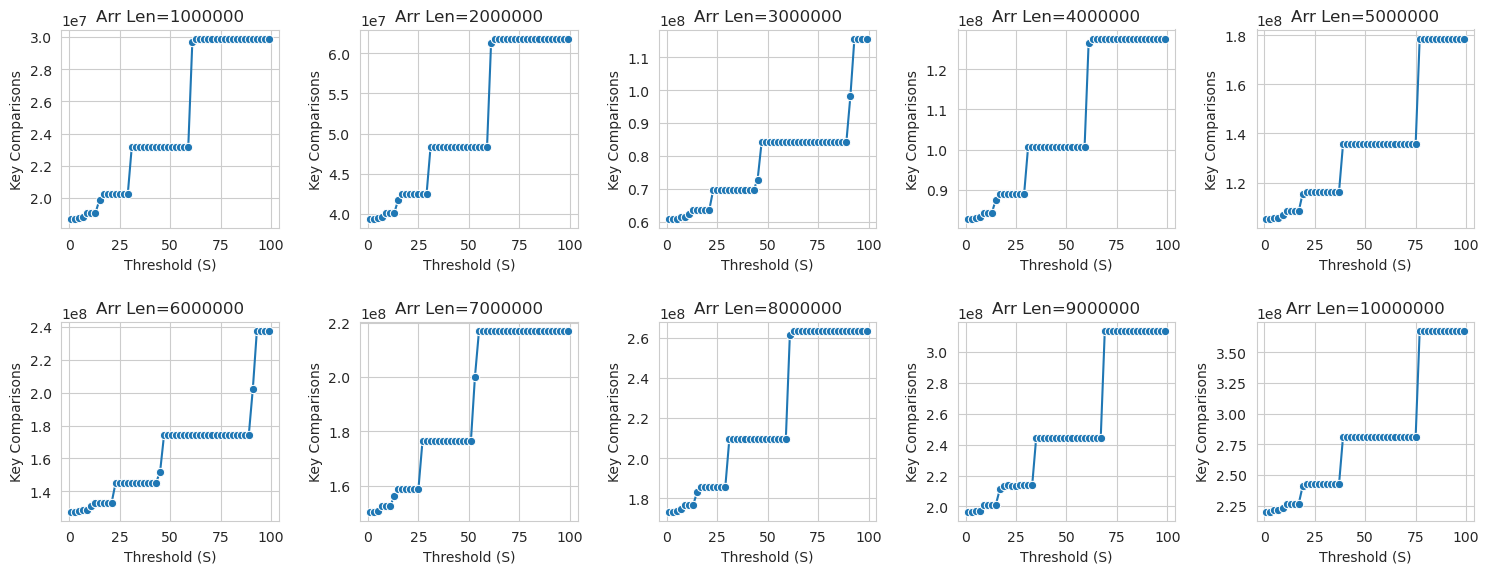

In [5]:
# Create subplots for Key Comparisons
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()  # Flatten in case of a 2D array

for i, arr_len in enumerate(filtered_arr_lengths):
    subset = df_results[df_results["Array Length"] == arr_len]
    sns.lineplot(x=subset["Threshold"], y=subset["Key Comparisons"], marker='o', ax=axes[i])
    axes[i].set_xlabel("Threshold (S)")
    axes[i].set_ylabel("Key Comparisons")
    axes[i].set_title(f"Arr Len={arr_len}")

# Hide unused subplots
for i in range(len(filtered_arr_lengths), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

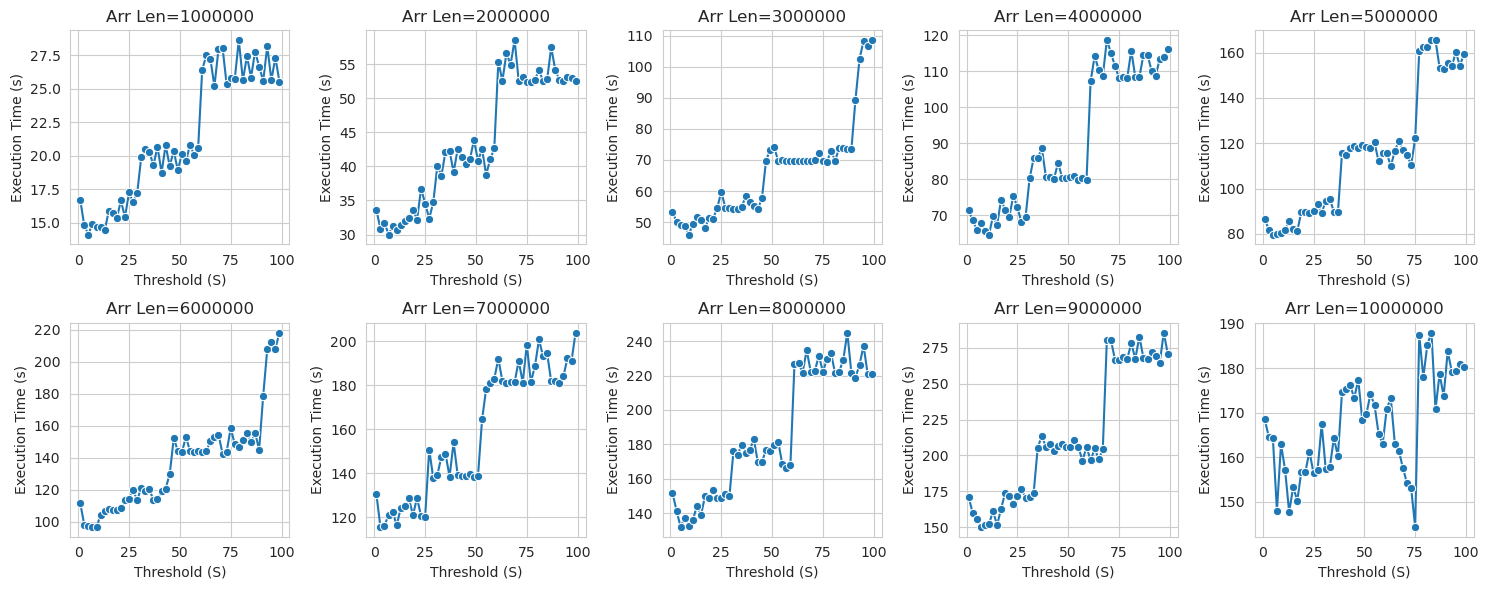

In [6]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()  # Flatten in case of a 2D array

for i, arr_len in enumerate(filtered_arr_lengths):
    subset = df_results[df_results["Array Length"] == arr_len]
    sns.lineplot(x=subset["Threshold"], y=subset["Execution Time"], marker='o', ax=axes[i])
    axes[i].set_xlabel("Threshold (S)")
    axes[i].set_ylabel("Execution Time (s)")
    axes[i].set_title(f"Arr Len={arr_len}")

# Hide unused subplots
for i in range(len(filtered_arr_lengths), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [7]:
filtered_thresholds = [threshold for threshold in sorted(df_results["Threshold"].unique()) if threshold % 5 == 0]
num_rows = math.ceil(len(filtered_thresholds) / num_cols)

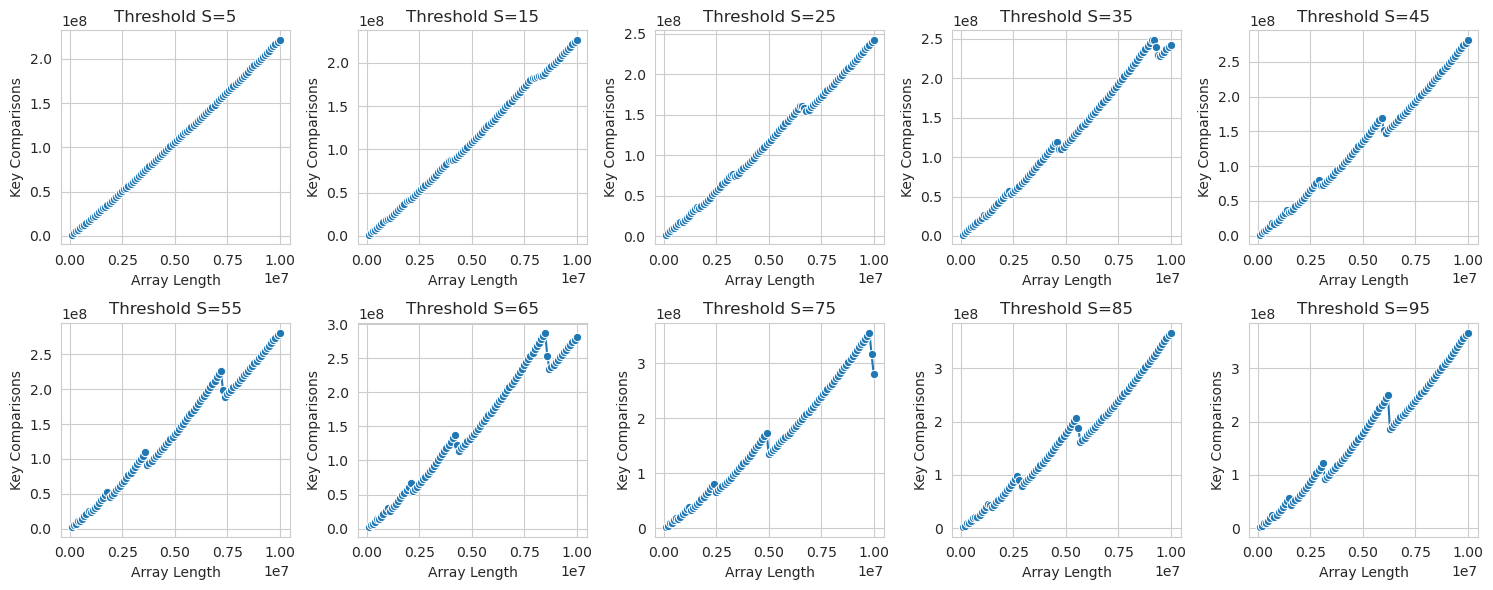

In [8]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()  # Flatten in case of a 2D array

for i, S in enumerate(filtered_thresholds):
    subset = df_results[df_results["Threshold"] == S]
    sns.lineplot(x=subset["Array Length"], y=subset["Key Comparisons"], marker='o', ax=axes[i])
    axes[i].set_xlabel("Array Length")
    axes[i].set_ylabel("Key Comparisons")
    axes[i].set_title(f"Threshold S={S}")

# Hide unused subplots
for i in range(len(filtered_thresholds), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


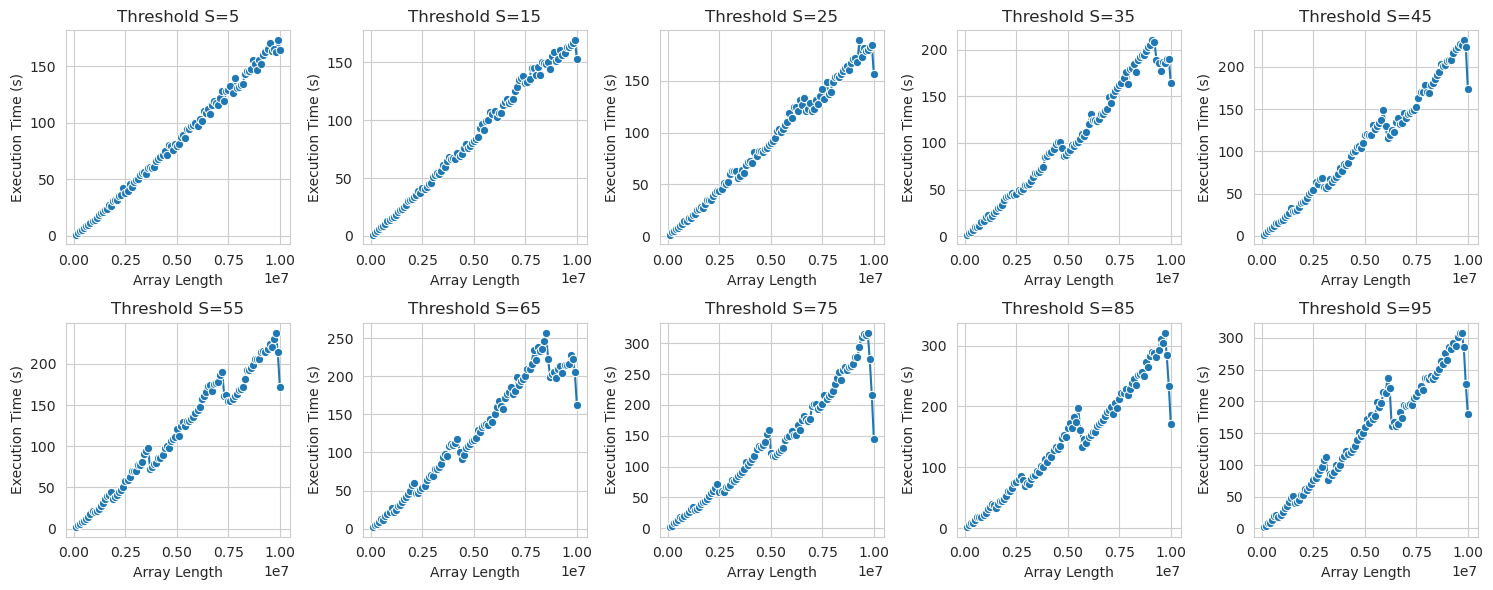

In [9]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()  # Flatten in case of a 2D array

for i, S in enumerate(filtered_thresholds):
    subset = df_results[df_results["Threshold"] == S]
    sns.lineplot(x=subset["Array Length"], y=subset["Execution Time"], marker='o', ax=axes[i])
    axes[i].set_xlabel("Array Length")
    axes[i].set_ylabel("Execution Time (s)")
    axes[i].set_title(f"Threshold S={S}")

# Hide unused subplots
for i in range(len(filtered_thresholds), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

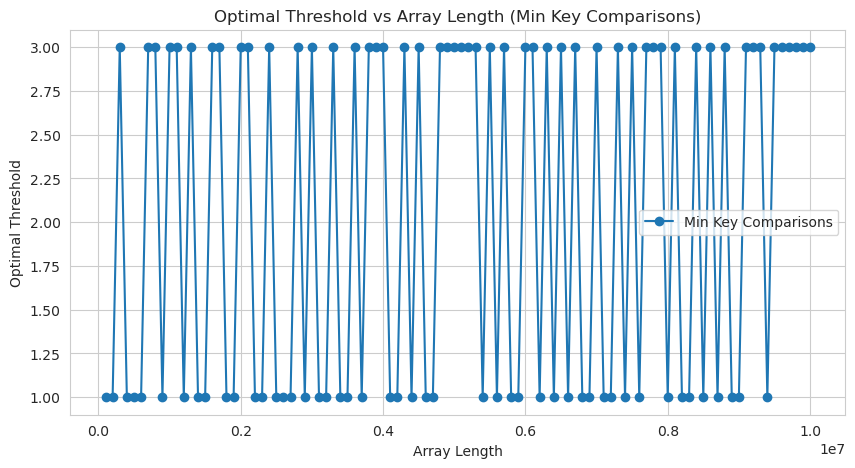

In [ ]:
# OPTIMAL S by key comparisons
optimal_by_key_comps = df_results.loc[df_results.groupby("Array Length")["Key Comparisons"].idxmin()]

# Plot optimal threshold based on key comparisons
plt.figure(figsize=(10, 5))
plt.plot(optimal_by_key_comps["Array Length"], optimal_by_key_comps["Threshold"], marker='o', label="Min Key Comparisons")
plt.xlabel("Array Length")
plt.ylabel("Optimal Threshold")
plt.title("Optimal Threshold vs Array Length (Min Key Comparisons)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
optimal_by_key_comps['Threshold'].value_counts()

Threshold
3    52
1    48
Name: count, dtype: int64

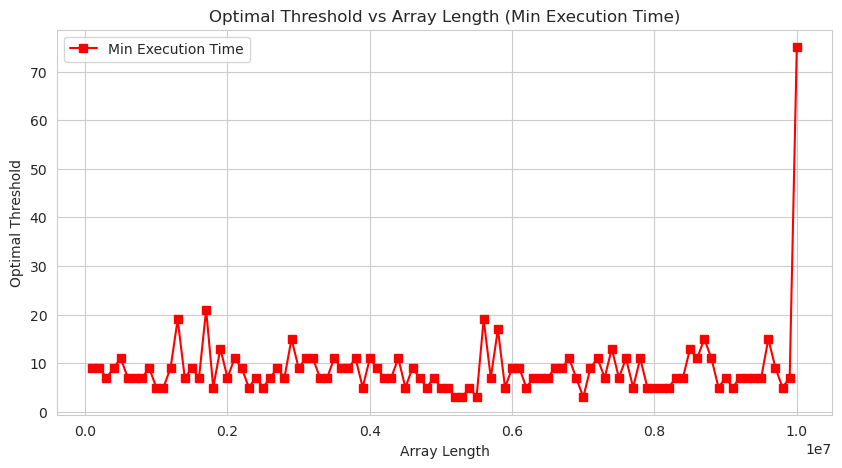

In [13]:
# OPTIMAL S by execution time
optimal_by_time = df_results.loc[df_results.groupby("Array Length")["Execution Time"].idxmin()]

# Plot optimal threshold based on execution time
plt.figure(figsize=(10, 5))
plt.plot(optimal_by_time["Array Length"], optimal_by_time["Threshold"], marker='s', label="Min Execution Time", color='red')
plt.xlabel("Array Length")
plt.ylabel("Optimal Threshold")
plt.title("Optimal Threshold vs Array Length (Min Execution Time)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
optimal_by_time['Threshold'].value_counts()

Threshold
7     31
5     21
9     19
11    14
3      4
13     3
15     3
19     2
21     1
17     1
75     1
Name: count, dtype: int64